1.0
Best parameters: {'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kernel': 'linear'}
Test accuracy: 1.0
use cv 5


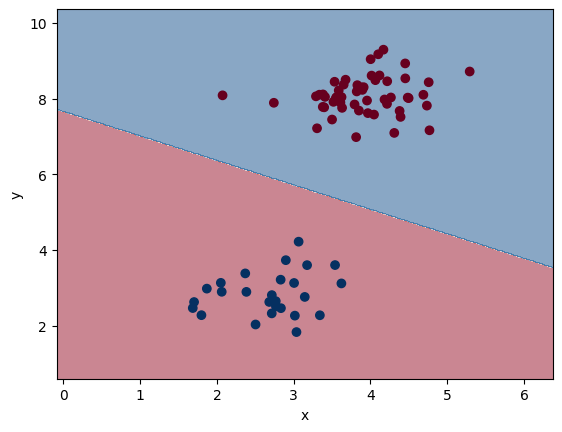

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score


# 加载数据集
data_file = 'D:/桌面/code/python/感知机/separable_data.txt'
data = np.loadtxt(data_file, delimiter=',')
X, y = data[:, :2], data[:, 2]

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义管道模型 'poly', 'rbf','linear'
model = make_pipeline(StandardScaler(), SVC())
param_grid = {'svc__C': [0.1,1,10], 'svc__kernel': ['poly', 'rbf','linear'], 'svc__gamma': [0.01,0.1, 1,10]} 
# 通过网格搜索去寻找最优解  , 'svc__gamma': [0.01,0.1, 1,10]
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)

# 在训练集上拟合模型，并选择最优参数
grid_search.fit(X_train, y_train)
# 用于检测使用核函数的分值 rbf:98 linear:96 poly:96
print(grid_search.score(X_train, y_train))

# 输出最优参数和在测试集上的准确率
best_params = grid_search.best_params_
test_accuracy = grid_search.score(X_test, y_test)
print('Best parameters:', best_params)
print('Test accuracy:', test_accuracy)
print('use cv',grid_search.cv)

# 绘制决策边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = grid_search.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdBu_r)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()
